In [63]:
# python 2/3 compatibility
from __future__ import print_function

# numerical python
import numpy as np

# file management tools
import glob
import os

# good module for timing tests
import time

# plotting stuff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# ability to read/write fits files
from astropy.io import fits

# fancy image combination technique
from astropy.stats import sigma_clipping

# median absolute deviation: for photometry
from astropy.stats import mad_std

# photometric utilities
from photutils import DAOStarFinder,aperture_photometry, CircularAperture, CircularAnnulus

In [64]:
# make the definitions for reading in images accessible in this notebook.
from HDI_io import *
# load up shifting methods
from shift_methods import *

## Define the working directory, reference image, list of images to shift

In [88]:
datadir = '/Volumes/Passport4TB/MinMs_Data_Testing/HIP12097_MMT_20161012/30.0/reduced/'

ref_image = '/Volumes/Passport4TB/MinMs_Data_Testing/HIP12097_MMT_20161012/30.0/reduced/HIP12097_30s-2016-10-12-MMT-022.fits'

im_list = glob.glob(datadir + '*.fits')

## Image shifting - be sure that HIP images are in their own "reduced" directory

In [89]:
def im_shift(datadir, ref_image, im_list, sig_clip = False, verbose = False):
    """
    docstring in progress
    """
    # Check for a shifted directory in current path:
    if os.path.exists(datadir+'shifted'):
        pass
    else:
        os.mkdir(datadir+'shifted')
        print('Creating new directory for shifted images in ' + datadir+'shifted')
    
    # get the master reference image
    ref = fits.getdata(ref_image)
    ref[np.isnan(ref)] = np.nanmedian(ref)
    
    n_ims = len(im_list)
    
    for image in im_list:
        im, hdr = fits.getdata(image, header=True)
        im[np.isnan(im)] = np.nanmedian(im)
        print(np.nanmedian(im))
        shortname = image.split('/')[-1]
        xshift, yshift = cross_image(ref, im, boxsize=10000)
        if verbose: print('X-shift, Y-shift for ', shortname, ': ', np.round(xshift,4), np.round(yshift, 4))
        output_im = shift_image(im, xshift, yshift)
        hdr['ALIGNED'] = ref_image
        fits.writeto(datadir + 'shifted/' 's_' + shortname, output_im, hdr, overwrite=True)
        if verbose: print('Writing new shifted image: ' + 's_' + shortname)
    return        

## Some testing first

In [90]:
ref = fits.getdata(ref_image)

In [91]:
im = fits.getdata(im_list[0])

In [92]:
newim = im
newim[np.isnan(newim)] = np.nanmedian(im)
ref[np.isnan(ref)] = np.nanmedian(ref)

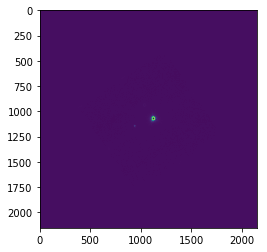

In [93]:
plt.imshow(ref)

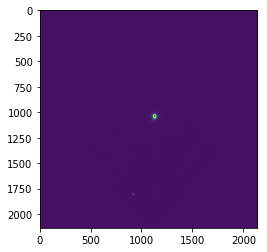

In [94]:
plt.imshow(newim)

In [95]:
xshift, yshift = cross_image(ref,newim, boxsize=2000)
xshift, yshift

(30.794522187703933, -0.2638748872363976)

In [96]:
output_im = shift_image(im, xshift, yshift)

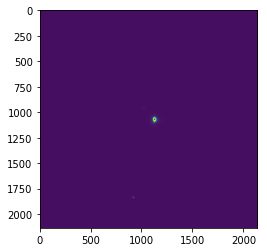

In [97]:
plt.imshow(output_im) 

## Run on the full list

In [98]:
im_shift(datadir, ref_image, im_list, 5.0, verbose=True)

-1.4531833009384139
X-shift, Y-shift for  HIP12097_30s-2016-10-12-MMT-000.fits :  20.7946 -7.7638
Writing new shifted image: s_HIP12097_30s-2016-10-12-MMT-000.fits
-0.7810341955911195
X-shift, Y-shift for  HIP12097_30s-2016-10-12-MMT-001.fits :  20.9158 2.1073
Writing new shifted image: s_HIP12097_30s-2016-10-12-MMT-001.fits
1.674031363453651
X-shift, Y-shift for  HIP12097_30s-2016-10-12-MMT-002.fits :  21.5714 -7.6381
Writing new shifted image: s_HIP12097_30s-2016-10-12-MMT-002.fits
2.3808052238962736
X-shift, Y-shift for  HIP12097_30s-2016-10-12-MMT-003.fits :  21.7843 -7.9814
Writing new shifted image: s_HIP12097_30s-2016-10-12-MMT-003.fits
2.667445754921705
X-shift, Y-shift for  HIP12097_30s-2016-10-12-MMT-004.fits :  21.1082 -8.2854
Writing new shifted image: s_HIP12097_30s-2016-10-12-MMT-004.fits
-3.819158784202897
X-shift, Y-shift for  HIP12097_30s-2016-10-12-MMT-005.fits :  19.7233 -4.7344
Writing new shifted image: s_HIP12097_30s-2016-10-12-MMT-005.fits
0.7494955072818792
X-sh

In [99]:
shift_list = glob.glob('/Volumes/Passport4TB/MinMs_Data_Testing/HIP12097_MMT_20161012/30.0/test/shifted/*fits')

In [100]:
arr = np.zeros([ref.shape[0], ref.shape[1], len(shift_list)])
arr.shape
for idx,im in enumerate(shift_list):
    arr[:,:,idx] = fits.getdata(im)

ValueError: could not broadcast input array from shape (1469,1470) into shape (2154,2149)

In [79]:
!open .

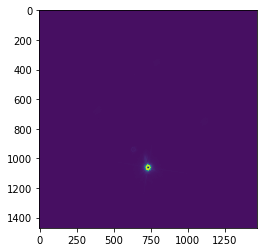

In [80]:
final = np.median(arr, axis=2)
plt.imshow(final)
fits.writeto("/Volumes/Passport4TB/MinMs_Data_Testing/HIP12097_MMT_20161012/30.0/test/shifted/combo.fits", final)

## scratch space below